In [21]:
import pandas as pd
import numpy as np
import pywt
from scipy.stats import median_absolute_deviation
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy import stats

df1 = pd.read_csv('/home/srchand/Desktop/research/NER_VTA/NER_VTA/data/ro_uart/rcg/demo/resnet18_ro_with_axi_6m_667_reduced.csv')
df2 = pd.read_csv('/home/srchand/Desktop/research/NER_VTA/NER_VTA/data/ro_uart/rcg/demo/resnet_18_gt_labels.csv')
df3= pd.read_csv('/home/srchand/Desktop/research/NER_VTA/NER_VTA/data/ro_uart/rcg/demo/resnet_18_yvote_labels.csv')
df1 = df1.drop(columns=['Unnamed: 0'])
df2 = df2.drop(columns=['Unnamed: 0'])
df3 = df3.drop(columns=['Unnamed: 0'])


In [28]:
df2.columns = ['Label']
df3.columns = ['Label']


,Label
0,0
1,0
2,0
3,0
4,0
...,...
5742,0
5743,0
5744,0
5745,0


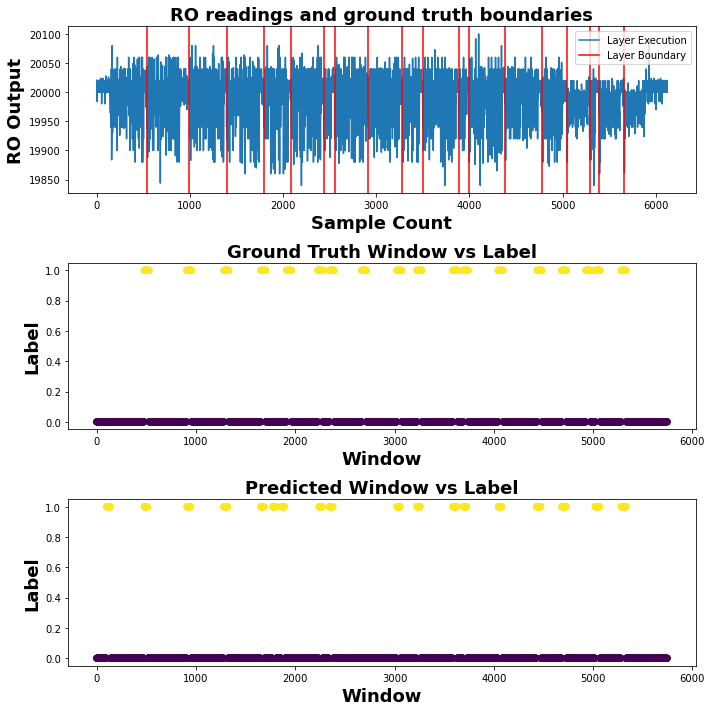

In [47]:
# Plotting in subplots
fig, axes = plt.subplots(3,1, figsize=(10, 10))  # 1 row, 3 columns

df_bound = df1[df1['LAYER_OR_BOUNDARY'] == 'boundary']
df_layer = df1[df1['LAYER_OR_BOUNDARY'] == 'layer']

axes[0].plot(df_layer.index, df_layer['RO_VALUE'], label='Layer Execution')

# plt.ylim(18000,22000)
for index, row in df_bound[:-1].iterrows():
    axes[0].axvline(x=index, color='red', linestyle='-')
axes[0].axvline(x=df_bound.index[-1], color='red', linestyle='-', label='Layer Boundary')
axes[0].set_title('RO readings and ground truth boundaries',fontsize=18, fontweight='bold')
axes[0].set_xlabel('Sample Count',fontsize=18, fontweight='bold')
axes[0].set_ylabel('RO Output',fontsize=18,fontweight='bold')
# plt.scatter(df_55555.index, df_55555['RO_VALUE'], color='red', label='Layer Boundary')
axes[0].legend()

colors = {0:'blue',1:'red'}

axes[1].scatter(x=df2.index, y=df2['Label'], c=df2['Label'], cmap='viridis')
axes[1].set_xlabel('Window',fontsize=18, fontweight='bold')
axes[1].set_ylabel('Label',fontsize=18, fontweight='bold')
axes[1].set_title('Ground Truth Window vs Label',fontsize=18, fontweight='bold')

axes[2].scatter(x=df3.index, y=df3['Label'], c=df3['Label'], cmap='viridis')
axes[2].set_xlabel('Window',fontsize=18, fontweight='bold')
axes[2].set_ylabel('Label',fontsize=18, fontweight='bold')
axes[2].set_title('Predicted Window vs Label',fontsize=18, fontweight='bold')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [11]:
df_bound

,RO_VALUE,LAYER_OR_BOUNDARY
